# Modelos de Regresión  

## Regresión Lineal (desde cero)

La regresión lineal desarrolla un modelo que ajusta las muestras usando una recta. Matemáticamente, la regresión lineal se representa mediante la ecuación $y = wx + b$.

Los hiperparámetros aquí son ($w,b$). La pendiente está determinada por $w$, mientras que $b$ establece el desplazamiento ```offset```; distancia vertical al eje x. El siguiente código muestra cuatro rectas diferentes con offsets que va desde 20 a 5 y pendientes crecientes desde 0.2 a 0.8.

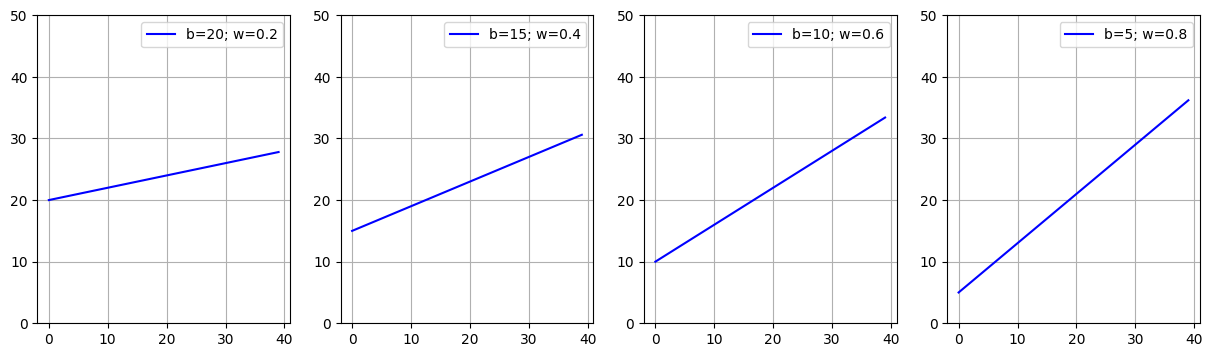

In [1]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 4, figsize=(15, 4))
X = np.array(range(40))
for fig, b, w in zip([0,1,2,3],[20,15,10,5],[0.2,0.4,0.6,0.8]):
    y = w*X + b
    axs[fig].plot(X,y, 'b-', label = 'b='+format(b)+'; w='+format(w))
    axs[fig].set_ylim(bottom=0,top=50)
    axs[fig].legend()
    axs[fig].grid()
    
plt.show()    

La regresión lineal se puede lelvar a cabo usando diferentes métodos (implementaciones):

- **Mínimos cuadrados:** Se trata de un método de optimización que busca minimizar la suma de los cuadrados de las diferencias entre los valores estimados y los valores observados. En otras palabras, trata de minimizar la distancia entre los puntos y la recta. Este método es muy sensible a los valores atípicos (outliers).
- **Máxima verosimilitud:** Se trata de un método de optimización que busca maximizar la probabilidad de que los parámetros del modelo generen los datos observados. Este método es muy sensible a los valores atípicos (outliers).
- **Descenso del gradiente:** Se trata de un método de optimización que busca minimizar la función de pérdida (loss function) iterativamente actualizando los parámetros del modelo en la dirección del gradiente negativo. Este método es menos sensible a los valores atípicos (outliers).

En esta ocasión vamos a usar el método conocido del gradiente descendete. Este algoritmo busca un mínimo en el hiper-espacio de errores; esto es: busca los errores más bajos que le sea posible encontrar. Se habrá encontrado una solución adecuada si se alcanza un mínimo global en un espacio cóncavo de errores o un mínimo local razonable en un espacio convexo de errores.

A continuación, se muestran las ecuaciones básicas que dan soporte al método de regresión lineal de gradiente descendente. 

La ecuación 1 muestra la función de coste, o función de pérdida (loss) que deseamos minimizar: el error existente en la predicción se calcula restando el valor de la muestra $y$, menos la predicción del modelo $wx_i+b$.

En vez de usar el valor absoluto, se utiliza el cuadrado para:

a) que sea posible derivar la ecuación y,

b) penalizar errores grandes.


$$
\begin{matrix}
\textrm{loss}\left ( \omega ,b \right ) = \frac{1}{N} \sum_{i=i}^{N}\left ( y_i - b - wx_i \right )^{2} & \left ( 1 \right )
\end{matrix}
$$

Las ecuaciones 2 y 3 muestran, respectivamente, las derivadas parciales de la función de coste respecto de $b$ y $\omega$. Ambas derivadas muestran la manera de alcanzar el mínimo de la función de error en su espacio tridiensional.


$$
\begin{matrix}
\frac{\partial \textrm{loss} \left ( \omega ,b  \right )}{\partial b}= -2\frac{1}{N} \sum_{i=i}^{N}\left ( y_i - b - wx_i \right ) & \left ( 2 \right )
\end{matrix}
$$

$$
\begin{matrix}
\frac{\partial \textrm{loss} \left ( \omega ,b  \right )}{\partial \omega}= -2\frac{1}{N} \sum_{i=i}^{N}x_i \left ( y_i - b - wx_i \right )& \left ( 3 \right )
\end{matrix}
$$


Las ecuaciones anteriores se implementan en el código mostrado a continuación, con $gradient_regression(X,y,alpha,b,w)$. Nótese del uso del parámetro $alpha$; es importante debido a que determina el tamaño de los pasos realizados para alcanzar el mìnimo en la función de error: si $alpha$ es muy pequeño, el algoritmo necesitará demasiado tiempo para alcanzar el mínimo; si $alpha$ es demasiado grande, podría "pasarse" el mínimo y oscilar a su aldededor sin alcanzarlo nunca. 

La función del modelo $model(X,y,alpha,b,w,epochs)$ muestra el concepto de "epoch" (ciclo, época): cada época se corresponde con el proceso de todas las muestras de datos; el modelo prograsa en cada época. En este código se han usado 9000 épcocas con el objetivo de encontrar una solución adecuada. 

La función $prediction(x,b,w)$ devuelve la predicción para $y$ procesando el modelo con los parámetros $b$ y $w$. La última función en el código: $loss(X,y,b,w)$ devuelve las diferencias cuadrátricas medias (MSD) como una medida de calidad del modelo obtenido aplicado a las muestras correspondientes.

El programa muestra cuatro grupos de información:

- El primer grupo visualiza los resultados de la regresión lineal correspondientes al modelo existente al inicio (cero ciclos), el siguiente cuando se alcanza el proceso de 3000 ciclos, y porteriormente al alcanzar 6000 y 9000 ciclos. Se puede observar que el algoritmo iterativo mejora el modelo a medida que elnúmero de ciclos aumenta. Cada leyenda de los gráficos incorpra el valor de la funciòn de coste MSD, que mejora progresivamente con el número de iteraciones.
- El segundo grupo de gráficos repote el mismo experimento, pero en este caso se ha elegido un valor del parámetro alpha excesivamente pequeño. Se puede observar que el algoritmo también itera hacia la solución, pero muy despacio debido al valor incorrecto de alpha. 
- El tercer grupo de gráficos contiene el conjunto de muestras de datos que no pueden ser clasificadas correctamente mediante un enfoque de regresión lineal. Esto se puede comprobar visualmente y se puede también establecer a partir de los grandes valores de error que muestran los resultados de coste. 
- El cuarto grupo de informaciónmuestra los valores de predicción para las muestras de x con valores de 10 y 20. Viendo el gráfico cuatro en el grupo uno (primera fila de gráficos), podemos observar que los valores de predicción son consistentes econ el rango esperado. 

Este prorama muestra dos implementaciones diferentes de la función $gradient_regression$. La primera no hace uso de las facilidades que Python nos brinda para operar con matrices y vectores.

Incluimos, la versión no vectorial porque se ajusta mejor a la forma de las ecuaciones que hemos formulado; además, los lectores que no estén familiarizados con las operaciones de matrices y vectores de Python entenderán mejor el código.

En este programa mostramos también un segundo bloque que hace uso de las operaciones con vecores y evita los bucles explicitos de iteración. Su implementación se realiza a través de las funciones $create_samples$ y $create_samples2$ que generan muestras de datos aleatorias.

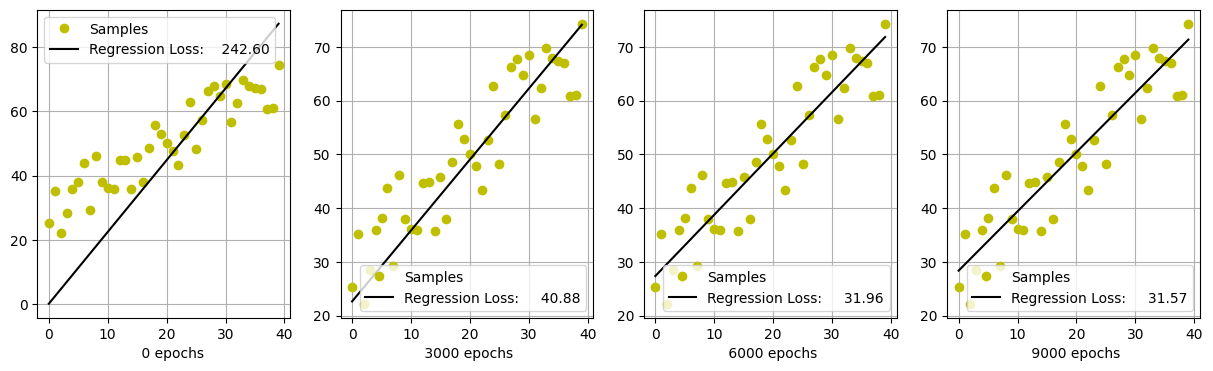

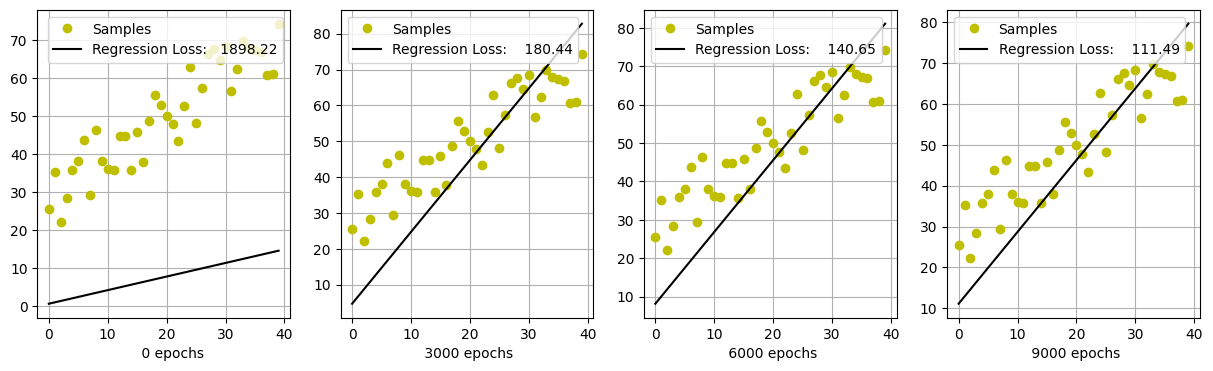

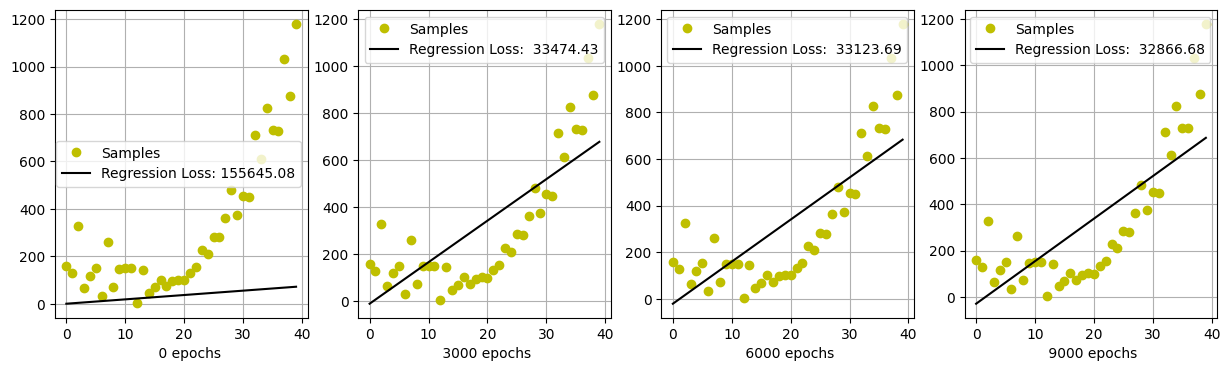

153.9437587273231
337.7820892737405


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random

def gradient_regression(X, y, alpha, b, w):
    dw = 0.0
    db = 0.0
    # we make the model by using all the samples
    for i in range(len(X)):
        aux = -2.0*(y[i]-((w*X[i])+b))
        db = db + aux # this solver can easily overflow
        dw = dw + X[i]*aux # this solver can easily overflow
    aux = 1.0/float(len(X))
    b = b - aux*alpha*db
    w = w - aux*alpha*dw
    return b, w

def gradient_regression_loss(X, y, alpha, b, w):
    aux = -2*(y-(w*X+b)).sum()
    b = b - alpha*aux/float(len(X))
    w = w - alpha*aux/float(len(X))
    return b, w

def plot(fig, X, y, b, w, epochs):
    axs[fig].plot(X, y, 'yo', label='Samples')
    X = np.array(X)
    axs[fig].plot(X, w*X + b, 'k-', label='Regression Loss: ' + '{:9.2f}'.format(loss(X, y, b, w)))
    axs[fig].set_xlabel('{:5.0f}'.format(epochs) + ' epochs')
    axs[fig].legend()
    axs[fig].grid()
    return 

def model(X,y,alpha,b,w,epochs):
    fig = 0 
    for e in range(epochs):
        b, w = gradient_regression(X, y, alpha, b, w)
        if e % 3000 == 0:
            plot(fig, X, y, b, w, e)
            fig += 1
    return b, w

def prediction(x, b, w):
    return (w*x) + b

def loss(X, y, b, w):
    sum = 0
    for i in range(len(X)):
        sum += (y[i] - prediction(X[i], b, w)) ** 2
    return sum / len(X)

def create_samples(n):
    y = []
    X = list(range(40))
    for i in range(len(X)):
        y.append(20+X[i]+random.random()*20)
    return X, y

def create_samples2(n):
    X = np.array(list(range(40)))
    y = 2*X*np.random.rand(40)*20
    return X, y

X, y = create_samples(40)

# In this example, we do not change epochs' value, since we just show #plots for
# the values (0, 3000, 6000, 9000)
EPOCHS = 9001

# linear regression evolution
fig, axs = plt.subplots(1, 4, figsize=(15, 4))
# b and w parameters can be better initialized
b, w = model(X, y, 0.001, random.random(), random.random(), EPOCHS)

# linear regression using a wrong alpha value
fig, axs = plt.subplots(1, 4, figsize=(15, 4))
# b and w parameters can be better initialized
model(X, y, 0.0001, random.random(), random.random(), EPOCHS)

y = []
for i in range(len(X)):
    y.append((X[i]-10)**2+random.random()*20*abs(len(X)/2-i))
    
# loss evolution
fig, axs = plt.subplots(1, 4, figsize=(15, 4))
# b and w parameters can be better initialized
b, w = model(X, y, 0.0001, random.random(), random.random(), EPOCHS)

plt.show()

print(prediction(10, b, w))
print(prediction(20, b, w))
